# Demo
## Vortex dynamics

In this example, we are going to simulate vortex core dynamics. After creating a vortex structure, we are first going to displace it by applying an external magnetic field. We will then turn off the external field, and compute the time-development of the system, and then be able to see the dynamics of the vortex core.

The sample is a two-dimensional Permalloy square sample with $d=100 \,\text{nm}$ edge length and $5\,\text{nm}$ thickness. Its energy equation consists of ferromagnetic exchange, Zeeman, and demagnetisation energy terms:
    
$$E = \int_{V} \left[-A\mathbf{m}\cdot\nabla^{2}\mathbf{m} - \mu_{0}M_\text{s}\mathbf{m}\cdot\mathbf{H} + w_\text{d}\right] \text{d}V,$$

where $A = 13 \,\text{pJ}\,\text{m}^{-1}$ is the exchange energy constant, $M_\text{s} = 8 \times 10^{5} \,\text{A}\,\text{m}^{-1}$ magnetisation saturation, $w_\text{d}$ demagnetisation energy density, $\mathbf{H}$ an external magnetic field, and $\mathbf{m}=\mathbf{M}/M_\text{s}$ the normalised magnetisation field.

The magnetisation dynamics is governed by the Landau-Lifshitz-Gilbert equation consisting of precession and damping terms:

$$\frac{\partial\mathbf{m}}{\partial t} = -\frac{\gamma_{0}}{1+\alpha^{2}}\mathbf{m}\times\mathbf{H}_\text{eff} - \frac{\gamma_{0}\alpha}{1+\alpha^{2}}\mathbf{m}\times(\mathbf{m}\times\mathbf{H}_\text{eff}),$$

where $\gamma_{0} = 2.211 \times 10^{5} \,\text{m}\,\text{A}^{-1}\,\text{s}^{-1}$ and $\alpha = 0.2$ is the Gilbert damping.

The (initial) magnetisation field is a vortex state, whose magnetisation at each point $(x, y, z)$ in the sample can be represented as $(m_{x}, m_{y}, m_{z}) = (-cy, cx, 0.1)$, with $c = 10^{9} \text{m}^{-1}$.

In [1]:
import discretisedfield as df
import micromagneticmodel as mm
import oommfc as oc

In [2]:
system = mm.System(name='vortex_dynamics')

In [3]:
system.energy = mm.Exchange(A=13e-12) + mm.Demag()
system.energy

Exchange(A=1.3e-11) + Demag()

In [4]:
system.dynamics = mm.Precession(gamma0=mm.consts.gamma0) + mm.Damping(alpha=0.2)
system.dynamics

Precession(gamma0=221276.14872118403) + Damping(alpha=0.2)

In [5]:
L = 50e-9
t = 5e-9
region = df.Region(p1=(-L, -L, -t/2), p2=(L, L, t/2))

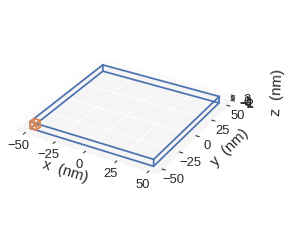

In [6]:
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))
mesh.mpl()

In [7]:
def init_m(point):
    x, y, z = point
    return -y, x, 1e-10

Ms = 8e5
system.m = df.Field(mesh, dim=3, value=init_m, norm=Ms)

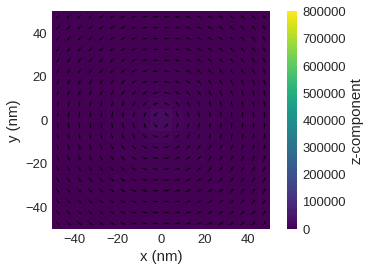

In [8]:
system.m.plane('z').mpl(scalar_kw={'clim': (0, Ms)})

In [9]:
md = oc.MinDriver()

In [10]:
md.drive(system)

Running OOMMF (ExeOOMMFRunner)[2022/06/10 18:20]... (0.4 s)


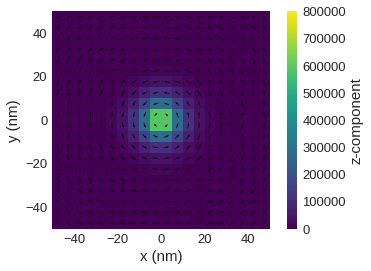

In [11]:
system.m.plane('z').mpl(scalar_kw={'clim': (0, Ms)})

In [12]:
system.energy += mm.Zeeman(H=(1e4, 0, 0))
system.energy

Exchange(A=1.3e-11) + Demag() + Zeeman(H=(10000.0, 0, 0))

In [13]:
md.drive(system)

Running OOMMF (ExeOOMMFRunner)[2022/06/10 18:20]... (0.4 s)


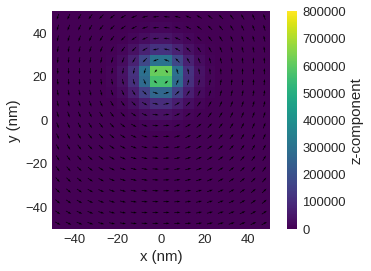

In [14]:
system.m.plane('z').mpl(scalar_kw={'clim': (0, Ms)})

In [15]:
system.energy.zeeman.H = (0, 0, 0)

In [16]:
td = oc.TimeDriver()

In [17]:
td.drive(system, t=5e-9, n=100, verbose=2)

Running OOMMF (ExeOOMMFRunner):   0%|          | 0/100 files written [00:00]

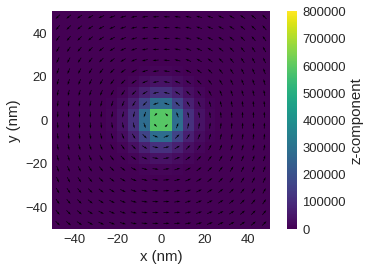

In [18]:
system.m.plane('z').mpl(scalar_kw={'clim': (0, Ms)})

In [19]:
system.table.data

E  E_calc_count   max_dm/dt         dE/dt       delta_E  \
0   1.841793e-18         181.0  677.134017 -2.158188e-10 -1.352886e-22   
1   1.835008e-18         362.0  523.605410 -9.731336e-11 -5.348531e-23   
2   1.830998e-18         543.0  543.679992 -8.914251e-11 -5.052501e-23   
3   1.825734e-18         718.0  611.500677 -1.068444e-10 -7.504266e-23   
4   1.821439e-18         893.0  439.031796 -6.532534e-11 -4.372589e-23   
..           ...           ...         ...           ...           ...   
95  1.765512e-18       16878.0    2.002144 -2.157981e-15 -1.396948e-27   
96  1.765512e-18       17053.0    1.810208 -1.735806e-15 -1.059173e-27   
97  1.765512e-18       17228.0    1.595738 -1.356480e-15 -8.936232e-28   
98  1.765512e-18       17403.0    1.378798 -1.053031e-15 -7.038920e-28   
99  1.765512e-18       17578.0    1.260693 -8.507758e-16 -5.129354e-28   

      E_exchange  max_spin_ang_exchange  stage_max_spin_ang_exchange  \
0   1.352736e-18              61.360868                    61.360868   
1   1.347520e-18              59.443934                    61.410098   
2   1.345686e-18              61.027926                    62.017291   
3   1.349470e-18              60.396843                    61.027926   
4   1.354693e-18              59.765290                    61.564667   
..           ...                    ...                          ...   
95  1.365677e-18              57.111910                    57.118209   
96  1.365677e-18              57.093102                    57.111910   
97  1.365677e-18              57.079748                    57.093102   
98  1.365677e-18              57.084700                    57.084757   
99  1.365677e-18              57.079210                    57.084702   

    run_max_spin_ang_exchange       E_demag  E_zeeman  iteration  \
0                   61.360868  4.890575e-19       0.0       28.0   
1                   61.410098  4.874885e-19       0.0       58.0   
2                   62.017291  4.853119e-19       0.0       88.0   
3                   62.017291  4.762632e-19       0.0      118.0   
4                   62.017291  4.667461e-19       0.0      148.0   
..                        ...           ...       ...        ...   
95                  62.059833  3.998354e-19       0.0     2878.0   
96                  62.059833  3.998351e-19       0.0     2908.0   
97                  62.059833  3.998349e-19       0.0     2938.0   
98                  62.059833  3.998347e-19       0.0     2968.0   
99                  62.059833  3.998346e-19       0.0     2998.0   

    stage_iteration  stage        mx        my        mz  last_time_step  \
0              28.0    0.0  0.292127  0.017468  0.021856    6.208039e-13   
1              29.0    1.0  0.285012  0.056678  0.021373    5.469774e-13   
2              29.0    2.0  0.274356  0.084749  0.022311    5.680505e-13   
3              29.0    3.0  0.246086  0.109965  0.022022    7.002496e-13   
4              29.0    4.0  0.225034  0.138052  0.021467    6.659703e-13   
..              ...    ...       ...       ...       ...             ...   
95             29.0   95.0 -0.000366 -0.000021  0.022938    6.173553e-13   
96             29.0   96.0 -0.000290 -0.000146  0.022938    5.793399e-13   
97             29.0   97.0 -0.000185 -0.000222  0.022938    6.266858e-13   
98             29.0   98.0 -0.000072 -0.000246  0.022938    6.358310e-13   
99             29.0   99.0  0.000028 -0.000226  0.022938    5.738955e-13   

               t  
0   5.000000e-11  
1   1.000000e-10  
2   1.500000e-10  
3   2.000000e-10  
4   2.500000e-10  
..           ...  
95  4.800000e-09  
96  4.850000e-09  
97  4.900000e-09  
98  4.950000e-09  
99  5.000000e-09  

[100 rows x 19 columns]

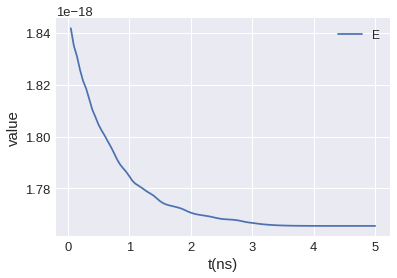

In [20]:
system.table.mpl(y=['E'])

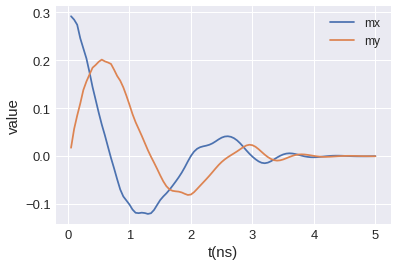

In [21]:
system.table.mpl(y=['mx', 'my'])

In [22]:
import micromagneticdata

In [23]:
data = micromagneticdata.Data(name=system.name)

In [24]:
data.info

drive_number        date      time      driver             t      n
0             0  2022-06-10  18:20:40   MinDriver           NaN    NaN
1             1  2022-06-10  18:20:40   MinDriver           NaN    NaN
2             2  2022-06-10  18:20:41  TimeDriver  5.000000e-09  100.0

In [25]:
data[-1].hv(kdims=['x', 'y'], vdims=['x', 'y'], scalar_kw={'clim': (0, Ms), 'cmap': 'viridis'})

:DynamicMap   [t]
   :Overlay
      .Image.I       :Image   [x,y]   (field)
      .VectorField.I :VectorField   [x,y]   (angle,mag)